## Import required packages and libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Read the data 

df =pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# shape of the data

df.shape

(200, 5)

In [5]:
# droping the column

df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# checking for any missing value in dataset

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# checking some statistical property of dataset

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


###  Correlation matrix

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

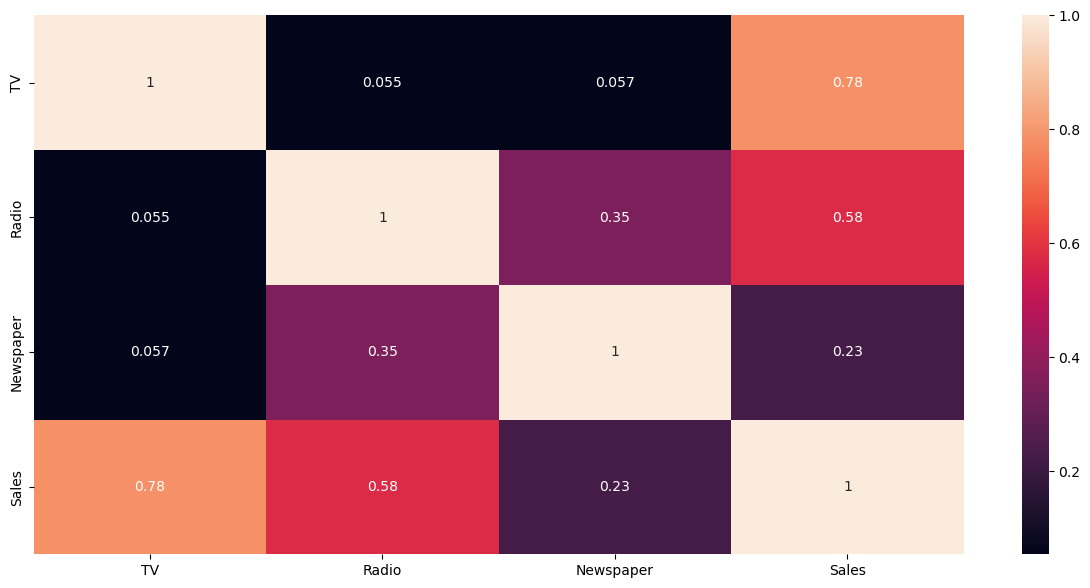

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Text(0.5, 1.0, 'scatterplot of TV & Sales')

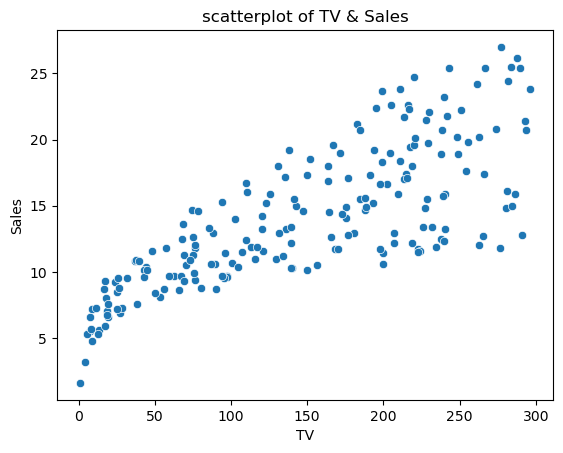

In [12]:
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'],)
plt.title("scatterplot of TV & Sales")

Text(0.5, 1.0, 'scatterplot of Radio & Sales')

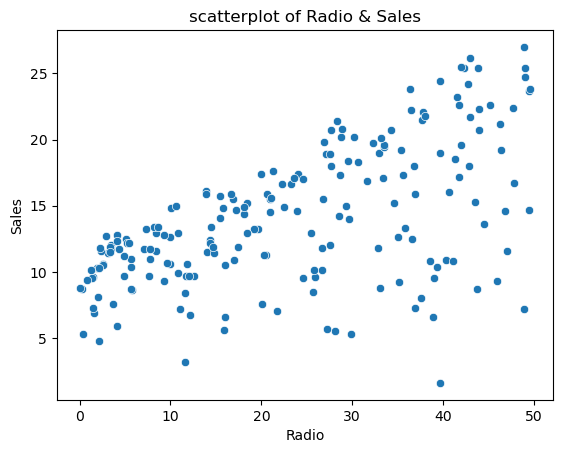

In [13]:
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'],)
plt.title("scatterplot of Radio & Sales")

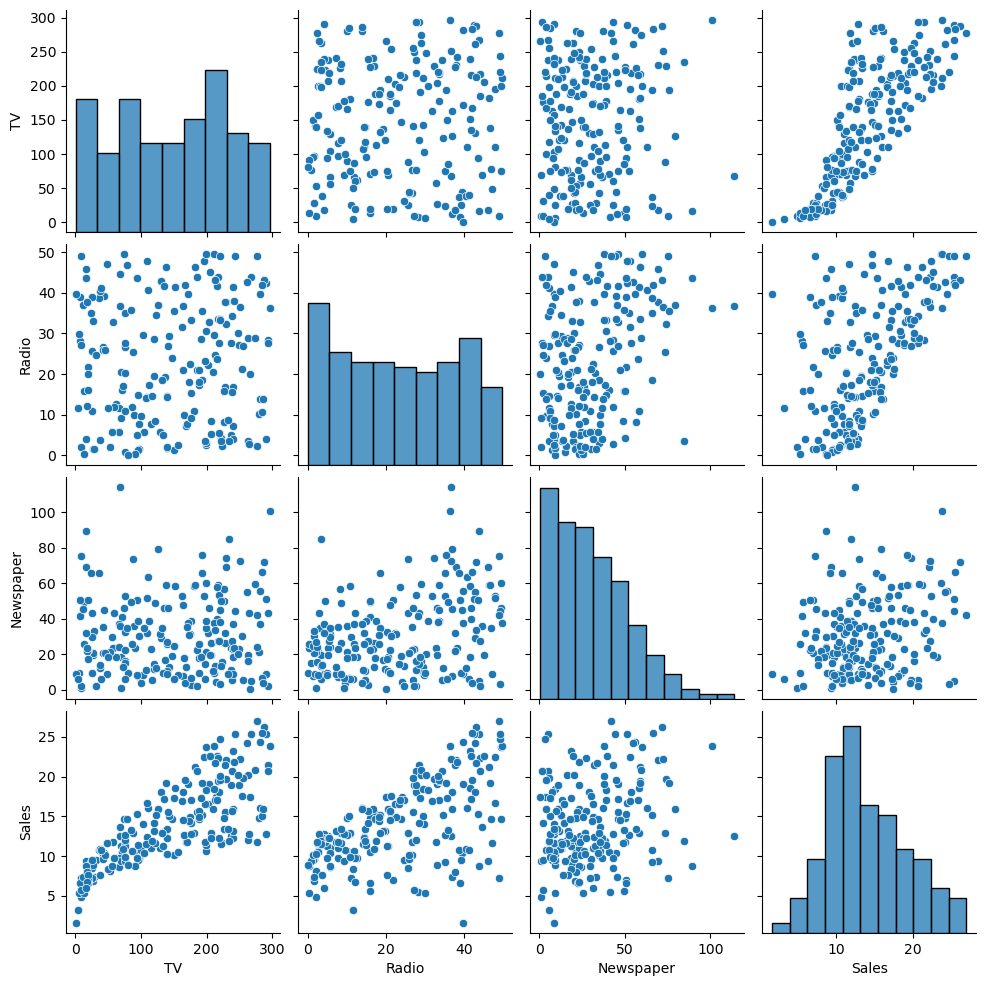

In [14]:
sns.pairplot(df)

In [15]:
# importing packages from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [16]:
X=df.iloc[:,:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
y=df.iloc[:,3]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Split the data into training and testing

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
print(x_train.shape,x_test.shape)

(160, 3) (40, 3)


In [20]:
x_test=x_test.astype(int)
x_train=x_train.astype(int)
y_test=y_test.astype(int)
y_train=y_train.astype(int)

In [21]:
# Normalize data 

sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [22]:
x_train_scaled

array([[ 0.07351731,  1.24858494,  1.38528131],
       [-0.89814003, -0.79061469,  0.342692  ],
       [ 0.42788646,  1.58845154,  1.38528131],
       [-0.54377088, -1.4703479 ,  0.05834946],
       [-0.37230194, -0.38277476,  0.43747284],
       [-1.59544706,  0.43290509, -0.93684943],
       [ 1.38811253,  1.38453158, -1.12641112],
       [-0.09795163, -0.24682812, -0.60511647],
       [-0.22369552,  0.90871833,  2.3804802 ],
       [ 1.54815021, -0.85858801, -0.36816435],
       [ 0.23355499, -0.85858801, -0.55772604],
       [ 1.05660591, -1.19845461, -0.2733835 ],
       [ 0.40502393, -0.85858801,  1.38528131],
       [ 0.90799949, -1.40237457, -0.65250689],
       [ 0.85084318,  0.70479837,  0.76920581],
       [ 1.05660591,  0.29695845, -0.84206858],
       [-0.57806467, -1.26642793, -0.98423985],
       [ 0.48504277, -0.11088148, -0.93684943],
       [ 1.1823498 ,  0.29695845, -0.32077393],
       [-1.56115327,  1.72439818,  2.1909185 ],
       [-0.54377088, -1.06250797, -1.031

In [23]:
# Buid model and train on traning data

model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [24]:
y_pred=model.predict(x_test_scaled)
y_pred

array([16.34891912, 13.77791628,  6.3757489 , 11.49546721, 11.90033721,
       20.35388004,  9.3659802 , 16.51536857, 20.29553518, 11.32278033,
       15.75503799, 14.72394196, 20.6912781 , 11.62598997, 12.41290665,
       12.00574182, 22.86612886, 14.77226938, 20.48623168, 11.56305946,
       19.91507676, 11.27567625, 20.31431477, 15.05326114, 19.77083261,
        7.47873604, 13.46106123, 11.50869285, 17.97179112, 10.22456461,
       18.057313  ,  3.92570291, 10.02728699, 16.71303215, 14.45020016,
        7.03412366,  7.91800136,  6.15998909, 20.81560776, 13.3278048 ])

### Evaluate the performance of  Linear Regression model

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,y_pred)

0.918158465279288

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [28]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1.2043078671751932
Mean Squared Error: 2.0851177008469395
Root Mean Squared Error: 1.4439936637142627


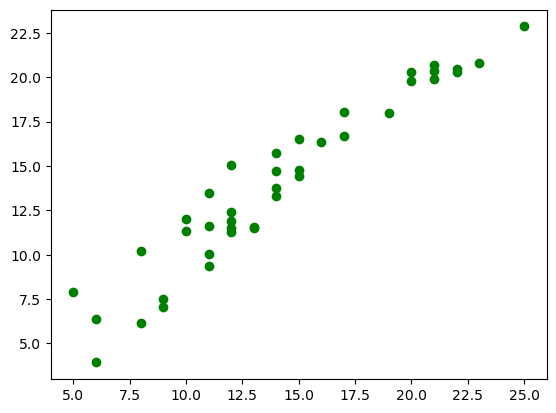

In [29]:
plt.scatter(y_test,y_pred,c='g')